In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from sklearn.metrics import roc_curve,auc, roc_auc_score,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.utils import shuffle

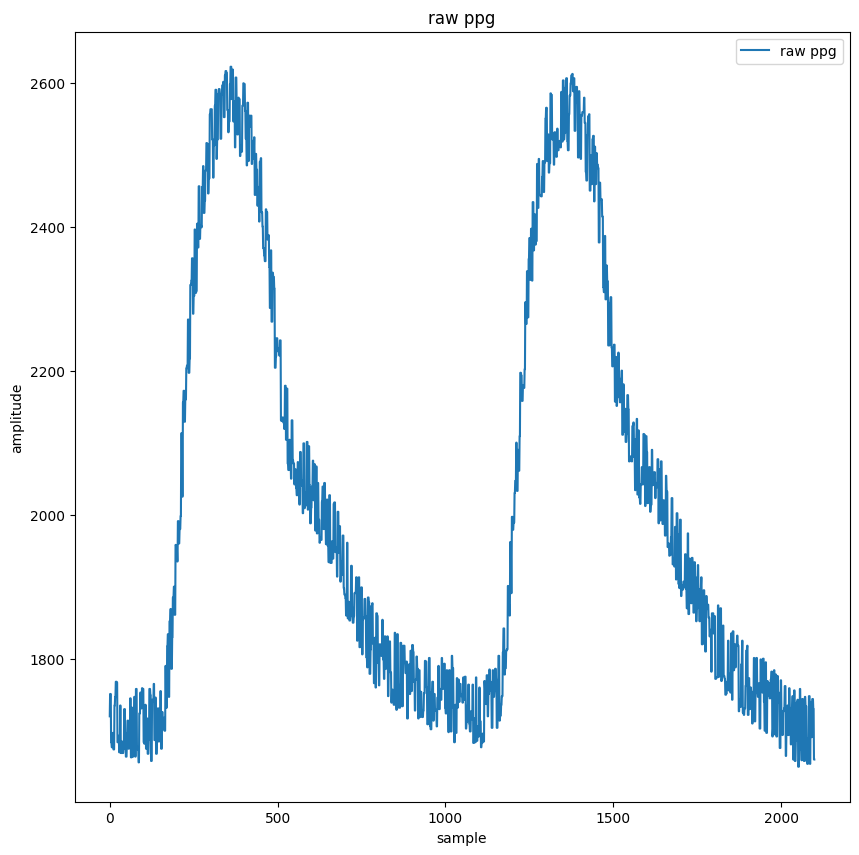

x [[1720 1751 1751 ... 1730 1660 1660]
 [1975 1975 1901 ... 2012 2012 2012]
 [1885 1903 1903 ... 1876 1876 1846]
 ...
 [1980 1980 1971 ... 2091 2091 2089]
 [1551 1551 1533 ... 2071 2071 2060]
 [1828 1828 1828 ... 2280 2284 2284]]
y [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
df =pd.read_csv('labeled_data.csv',header=None)
x = df.iloc[:,:2100].values
y = df.iloc[:,2100].values
plt.figure(figsize=(10,10))
plt.plot(x[0],label='raw ppg')
plt.title('raw ppg')
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.legend()
plt.show()
print('x',x)
print('y',y)

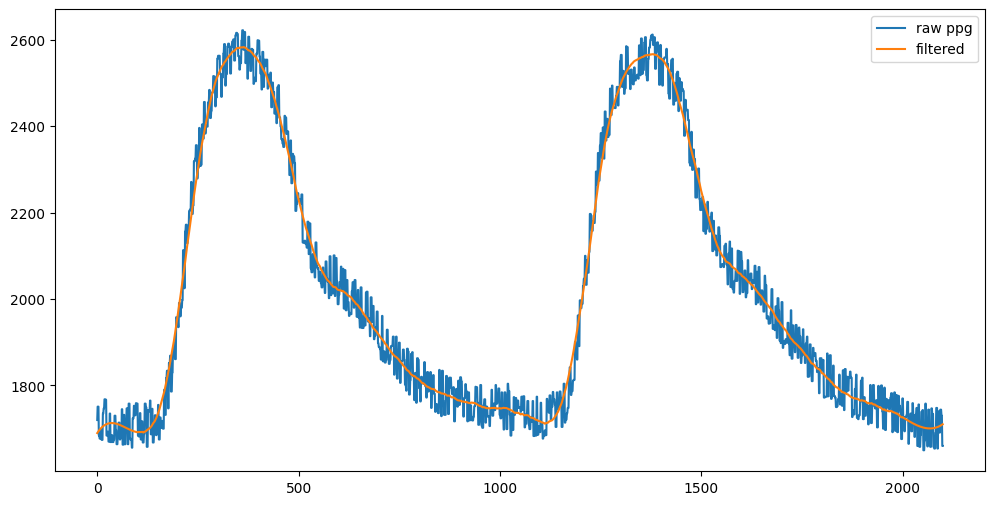

In [42]:
# apply savitzky-golay filter to the data
filtered = savgol_filter(x[0], window_length=201, polyorder=3)
plt.figure(figsize=(12,6))
plt.plot(x[0],label='raw ppg')

plt.plot(filtered,label='filtered')
plt.legend()
plt.show()


plt.show()


In [43]:
def extract_features(data):
    features = []
    #1.mean
    features.append(np.mean(data))
    #2.std
    features.append(np.std(data))
    #3. variance
    features.append(np.var(data))
    #4, skewness
    features.append(stats.skew(data))
    #5, kurtosis
    features.append(stats.kurtosis(data))
    #6 rms
    features.append(np.sqrt(np.mean(data**2)))
    #7 peak amplitude
    features.append(np.max(data) - np.min(data))
   #8 zero CROSSING RATE
    features.append(((data[:-1] * data[1:]) < 0).sum())
    #9 mean absolute deviation
    features.append(np.mean(np.abs(data - np.mean(data))))
    #10 energy
    features.append(np.sum(data**2))
    return features
   
   # extract features for all signal
x_features = np.array([extract_features(signal) for signal in x])
feature_names = ['mean', 'std', 'variance', 'skewness', 'kurtosis', 'rms', 'peak amplitude', 'zero crossing rate', 'mean absolute deviation', 'energy'] 



In [44]:

feature_name=['Mean',"Std","Variance","Skewness","Kurtosis","RMS","Peak-to-Peak",'Zero-Crossing',"MAD","Energy"]
x_train,x_test,y_train,y_test=train_test_split(x_features,y,test_size=0.3,random_state=42)
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

y_prob=rf.predict_proba(x_test)[:,1]


fpr, tpr , thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


PRECISION: 0.5952
RECALL: 0.8065
F1 Score: 0.6849


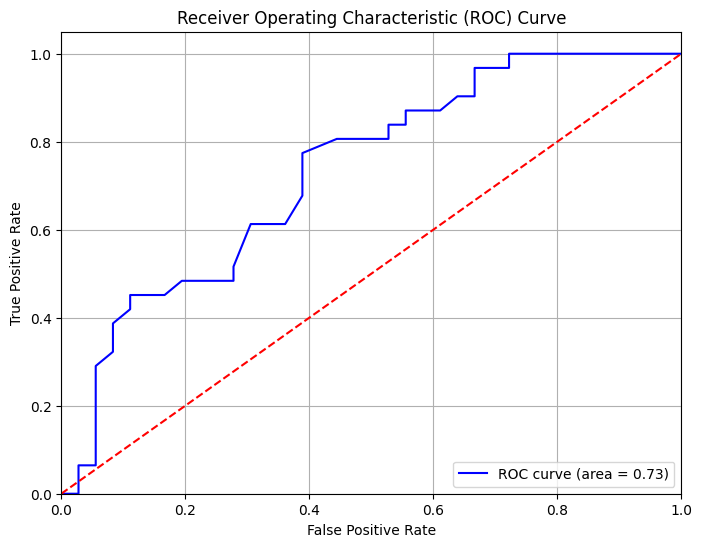

In [45]:
confusion_matrix = confusion_matrix(y_test, y_pred)
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(F"PRECISION: {precision:.4f}")
print(f"RECALL: {recall:.4f}") 
print(f"F1 Score: {f1:.4f}")


# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr , thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


 

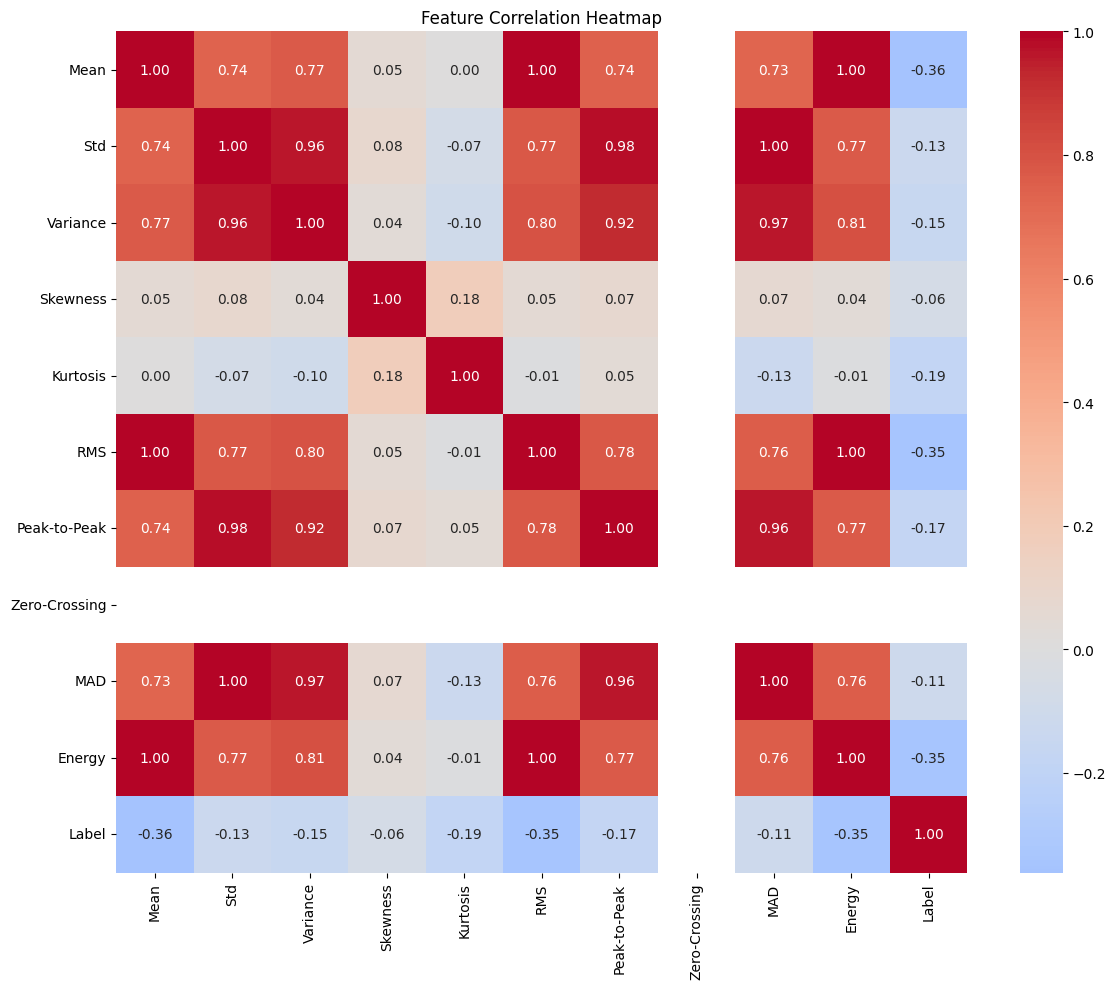

In [58]:
 # Shuffle data
x,y = shuffle(x,y, random_state=42)
 # Feature extraction function
def extract_features(signal):
    features = [
        np.mean(signal),
        np.std(signal),
        np.var(signal),
        pd.Series(signal).skew(),
        pd.Series(signal).kurtosis(),
        np.sqrt(np.mean(signal**2)),
        np.max(signal) - np.min(signal),
        ((signal[:-1] * signal[1:]) < 0).sum(),
        np.mean(np.abs(signal - np.mean(signal))),
        np.sum(signal**2)
    ]
    return features
    
# Extract features for all signals
X_features = np.array([extract_features(x) for x in x])
feature_names = ['Mean', 'Std', 'Variance', 'Skewness', 'Kurtosis', 
                 'RMS', 'Peak-to-Peak', 'Zero-Crossing', 'MAD', 'Energy']
 # Create DataFrame for feature correlation analysis
feature_df = pd.DataFrame(X_features, columns=feature_names)
feature_df['Label'] = y
 # Shuffle data
X_features, y = shuffle(X_features, y, random_state=42)
 ## 1. Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_matrix = feature_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()




In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, f1_score, roc_auc_score, 
                            confusion_matrix, classification_report)
 # Initialize metrics storage
metrics = {
    'accuracy': [], 'precision': [], 'recall': [], 
    'f1': [], 'roc_auc': [], 'conf_matrices': []
 }
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for fold, (train_idx, test_idx) in enumerate(cv.split(X_features, y), 1):
    X_train, X_test = X_features[train_idx], X_features[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Store metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred))
    metrics['recall'].append(recall_score(y_test, y_pred))
    metrics['f1'].append(f1_score(y_test, y_pred))
    metrics['roc_auc'].append(roc_auc_score(y_test, y_prob))
    print(f"\nFold {fold} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    
    


    


Fold 1 Results:
Accuracy: 0.782608695652174
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.75      0.82      0.78        11

    accuracy                           0.78        23
   macro avg       0.78      0.78      0.78        23
weighted avg       0.79      0.78      0.78        23


Fold 2 Results:
Accuracy: 0.7391304347826086
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.75      0.75      0.75        12

    accuracy                           0.74        23
   macro avg       0.74      0.74      0.74        23
weighted avg       0.74      0.74      0.74        23


Fold 3 Results:
Accuracy: 0.5909090909090909
              precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.62      0.45      0.53        11

    accuracy                           0.59  

In [67]:
avg_metrics = {k: np.mean(v) for k, v in metrics.items() if k != 'conf_matrices'}
std_metrics = {k: np.std(v) for k, v in metrics.items() if k != 'conf_matrices'}
print("\n=== Aggregate 10-Fold CV Results ===")
for metric in avg_metrics:
    print(f"{metric.capitalize()}: {avg_metrics[metric]:.4f} (±{std_metrics[metric]:.4f})")
 # Plot average confusion matrix
avg_conf_matrix = np.mean(metrics['conf_matrices'], axis=0)
plt.figure(figsize=(6, 6))
sns.heatmap(avg_conf_matrix, annot=True, fmt='.1f', cmap='Blues')
plt.title('Average Confusion Matrix')
plt.show()



=== Aggregate 10-Fold CV Results ===
Accuracy: 0.7249 (±0.0697)
Precision: 0.7278 (±0.0722)
Recall: 0.7205 (±0.1186)
F1: 0.7201 (±0.0849)
Roc_auc: 0.7964 (±0.0710)


ValueError: Must pass 2-d input. shape=()

<Figure size 600x600 with 0 Axes>